# Time Series Analysis
### Table of Contents:

01. Libraries Import & API Key
02. Data Import
03. Data Subsetting, Wrangling, & Cleaning
04. Decomposing
05. Stationary Test(s)
06. Stationarizing the Data

## 01. Libraries Import & API Key

In [1]:
import quandl
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm 
import os
import warnings 

warnings.filterwarnings("ignore")

plt.style.use('fivethirtyeight')

In [2]:
# Configure API key; was part of the exercise, but not using data from Quandl, so unsure if I need to keep this in here.
        
quandl.ApiConfig.api_key = 'oYsJjKDwwTqrtc42y85Q'

## 02. Data Import

In [3]:
# Create a string path

path = r'C:\Users\rasmu\Documents\CareerFoundry\A6 National Parks Analysis'

In [4]:
# Import data

df = pd.read_csv(os.path.join(path, '02 Data', 'Prepd Data', 'NatlParks_clean.csv'))

In [5]:
df.head(5)

,Unnamed: 0,ParkName,UnitCode,Region,State,Year,Month,RecVisits,NonRecVisits,RecHours,NonRecHours,TentCampers,RVCampers,Backcountry,RecHrsRange
0,0,Acadia NP,ACAD,Northeast,ME,2012,1,11930,600,78738,600,0,0,0,Low usage
1,1,Acadia NP,ACAD,Northeast,ME,2012,2,12388,600,81758,600,0,0,0,Low usage
2,2,Acadia NP,ACAD,Northeast,ME,2012,3,22684,600,149716,600,0,0,0,Usual usage
3,3,Acadia NP,ACAD,Northeast,ME,2012,4,59471,600,344929,600,1338,174,0,Usual usage
4,4,Acadia NP,ACAD,Northeast,ME,2012,5,157406,7500,894751,7500,7800,1467,29,High usage


In [6]:
# Need to drop the 'Unnamed: 0' column

df = df.drop(columns = ['Unnamed: 0'])

## 03. Data Subsetting, Wrangling, & Cleaning

In [7]:
# Checking data types

df.dtypes

ParkName        object
UnitCode        object
Region          object
State           object
Year             int64
Month            int64
RecVisits        int64
NonRecVisits     int64
RecHours         int64
NonRecHours      int64
TentCampers      int64
RVCampers        int64
Backcountry      int64
RecHrsRange     object
dtype: object

In [8]:
# Change dtypes of Month & Year columns to help create the a date to be used as the index

df['Month'] = df['Month'].astype('str')

In [9]:
df['Year'] = df['Year'].astype('str')

In [10]:
# Checking the changes

df.dtypes

ParkName        object
UnitCode        object
Region          object
State           object
Year            object
Month           object
RecVisits        int64
NonRecVisits     int64
RecHours         int64
NonRecHours      int64
TentCampers      int64
RVCampers        int64
Backcountry      int64
RecHrsRange     object
dtype: object

In [11]:
# Need to create a column that combines Month & Year as a date to be used as the index

# Editing the Month observations from 1, 2, 3... to 01, 02, 03...

df['Month'].replace(['1', '2', '3', '4', '5', '6', '7', '8', '9'], ['01', '02', '03', '04', '05', '06', '07', '08', '09'], 
                    inplace=True)

In [12]:
df.head(5)

,ParkName,UnitCode,Region,State,Year,Month,RecVisits,NonRecVisits,RecHours,NonRecHours,TentCampers,RVCampers,Backcountry,RecHrsRange
0,Acadia NP,ACAD,Northeast,ME,2012,01,11930,600,78738,600,0,0,0,Low usage
1,Acadia NP,ACAD,Northeast,ME,2012,02,12388,600,81758,600,0,0,0,Low usage
2,Acadia NP,ACAD,Northeast,ME,2012,03,22684,600,149716,600,0,0,0,Usual usage
3,Acadia NP,ACAD,Northeast,ME,2012,04,59471,600,344929,600,1338,174,0,Usual usage
4,Acadia NP,ACAD,Northeast,ME,2012,05,157406,7500,894751,7500,7800,1467,29,High usage


In [13]:
# Combinging the Year & Month columns to create a Data column

df['Date'] = df[['Year', 'Month']].agg('-'.join, axis=1)

In [14]:
df.tail(5)

,ParkName,UnitCode,Region,State,Year,Month,RecVisits,NonRecVisits,RecHours,NonRecHours,TentCampers,RVCampers,Backcountry,RecHrsRange,Date
7555,Zion NP,ZION,Intermountain,UT,2021,08,466928,1860,3105093,1860,21399,7786,1206,High usage,2021-08
7556,Zion NP,ZION,Intermountain,UT,2021,09,483180,1800,3076210,1800,15670,7615,1500,High usage,2021-09
7557,Zion NP,ZION,Intermountain,UT,2021,10,469379,1860,2902495,1860,11916,7181,1769,High usage,2021-10
7558,Zion NP,ZION,Intermountain,UT,2021,11,308560,1800,1932994,1800,7298,5431,931,High usage,2021-11
7559,Zion NP,ZION,Intermountain,UT,2021,12,211983,1860,1321213,1860,4336,4798,126,High usage,2021-12


In [15]:
# Creating a subset for Recreation Hours

sub_1 = df.drop(columns = ['ParkName', 'UnitCode', 'State', 'Year', 'Month', 'RecVisits', 'NonRecVisits', 'NonRecHours', 
                           'TentCampers', 'RVCampers', 'Backcountry', 'RecHrsRange'])

In [16]:
sub_1

,Region,RecHours,Date
0,Northeast,78738,2012-01
1,Northeast,81758,2012-02
2,Northeast,149716,2012-03
3,Northeast,344929,2012-04
4,Northeast,894751,2012-05
...,...,...,...
7555,Intermountain,3105093,2021-08
7556,Intermountain,3076210,2021-09
7557,Intermountain,2902495,2021-10
7558,Intermountain,1932994,2021-11


In [17]:
# For the sake of the activity, I'm going to look closer at one region's overall time series, as the entire Parks data created 
# a messy data plot

sub_IM = sub_1[sub_1['Region'].str.contains('Intermountain')]
print(sub_IM)

              Region  RecHours     Date
120   Intermountain      54781  2012-01
121   Intermountain      59926  2012-02
122   Intermountain     321771  2012-03
123   Intermountain     462894  2012-04
124   Intermountain     605653  2012-05
...              ...       ...      ...
7555  Intermountain    3105093  2021-08
7556  Intermountain    3076210  2021-09
7557  Intermountain    2902495  2021-10
7558  Intermountain    1932994  2021-11
7559  Intermountain    1321213  2021-12

[2280 rows x 3 columns]


In [18]:
sub_IM2 = sub_IM.groupby(['Date']).agg({'RecHours': ['sum']})
print(sub_IM2)

         RecHours
              sum
Date             
2012-01   4806191
2012-02   5146865
2012-03   9655974
2012-04  12899780
2012-05  20731307
...           ...
2021-08  49728337
2021-09  43353274
2021-10  22822052
2021-11  12104999
2021-12   9557144

[120 rows x 1 columns]


In [19]:
sub_IM2.shape

(120, 1)

In [20]:
sub_IM2.columns

MultiIndex([('RecHours', 'sum')],
           )

In [21]:
type(sub_IM2)

pandas.core.frame.DataFrame

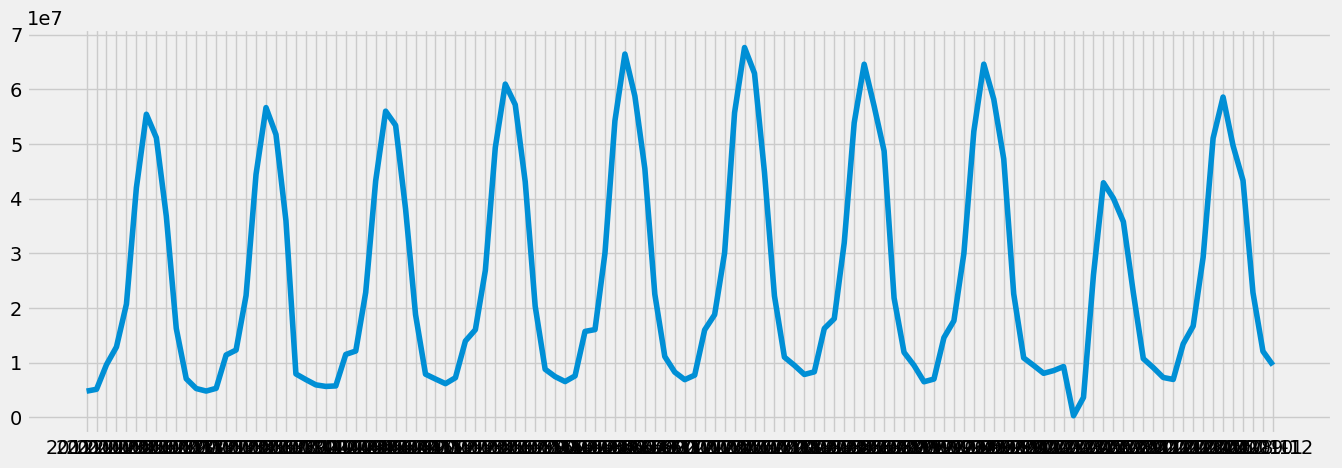

In [22]:
# Plot the data using matplotlib.

plt.figure(figsize=(15,5), dpi=100) 

plt.plot(sub_IM2)

#### Subset Explaination

As mentioned earlier, there was too much overall data to get a clear picture. With the amount of different parks, the different types of parks, the different regions, and the individual data for each park per month for a 5-year period, the inital plot was a tangled mess. At the end of it all, I elected to take just the Intermountain region parks and then group by total attendance at all parks for each month over the 5 year span.

## 04. Decomposing

In [23]:
# Experienced the error "ValueError: You must specify a period or x must be a pandas object with a DatetimeIndex with a freq not set to None"
# so I am trying to change the Date to 'datetime' in the index in hopes that it will work.

# To start, I need to reset index so that I can have the 'Date' column to rename.

sub_IM3 = sub_IM2.reset_index()

In [24]:
sub_IM3.head(5)

,Date,RecHours
,,sum
0,2012-01,4806191
1,2012-02,5146865
2,2012-03,9655974
3,2012-04,12899780
4,2012-05,20731307


In [25]:
# Resetting the 'Date' column as the index, 'datetime'

from datetime import datetime

sub_IM3['datetime'] = pd.to_datetime(sub_IM3['Date'])
sub_IM3 = sub_IM3.set_index('datetime')
sub_IM3.drop(['Date'], axis=1, inplace=True)
sub_IM3.head()

,RecHours
,sum
datetime,
2012-01-01,4806191
2012-02-01,5146865
2012-03-01,9655974
2012-04-01,12899780
2012-05-01,20731307


In [26]:
# Decomposing the time series using an additive model

decomposition = sm.tsa.seasonal_decompose(sub_IM3, model='additive')


In [27]:
# Defining a fixed size for all special charts

from pylab import rcParams 

rcParams['figure.figsize'] = 18, 7

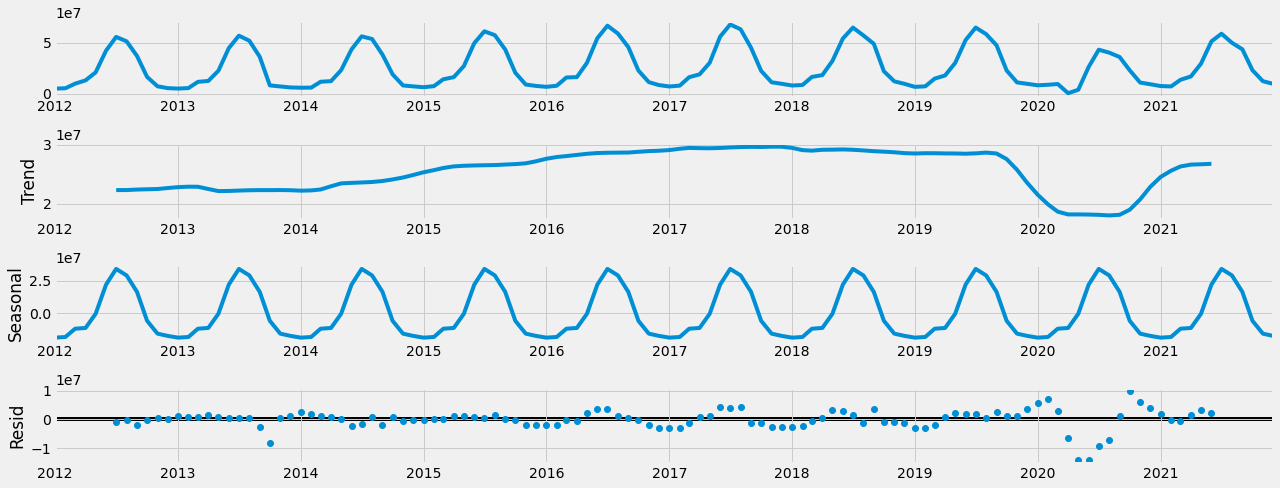

In [28]:
# Plot the separate components

decomposition.plot()
plt.show()

#### Decomposing Analysis

The seasonality of the data is pretty even. There's no real surprise to that, but the fact that the limited noise (outside of COVID-19 times) even looks seasonal or cyclical is very interesting. The trend line only really drops off, most likely, due to COVID-19 protocols limiting lands access or ability to camp. I'm curious to see if that's enough to make the data stationary or not.

## 05. Stationary Test(s)

In [29]:
# Importing the adfuller() function and performing a Dickey-Fuller Test on the time series

from statsmodels.tsa.stattools import adfuller 

def dickey_fuller(timeseries): 
    
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)

# Apply the test using the function on the time series
dickey_fuller(sub_IM3['RecHours'])

Dickey-Fuller Stationarity test:
Test Statistic                  -2.336677
p-value                          0.160412
Number of Lags Used             13.000000
Number of Observations Used    106.000000
Critical Value (1%)             -3.493602
Critical Value (5%)             -2.889217
Critical Value (10%)            -2.581533
dtype: float64


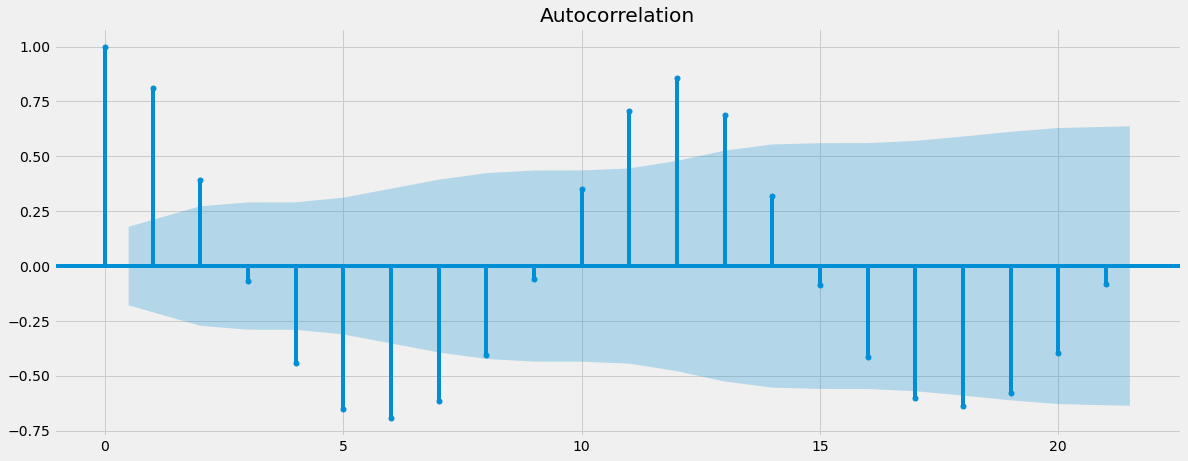

In [30]:
# Checking a plot of autocorrelations

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(sub_IM3)
plt.show()

#### Tests Interpretation

The .16 p-value makes this a slightly significant test.

NULL HYPOTHESIS: There is a unit root, making the data non-stationary.
ALTERNATIVE HYPOTHESIS: There is not a unit root, making the data stationary.

Unfortunately, the test statistic (-2.34) > Critical Value (5%) (-2.89), so we cannot reject our null hypothesis. This data is not stationary and needs some differencing.

At the same time, there's still enough lines of autocorrelation outside of the area to show that it's non-stationary too.

## 06. Stationarizing the Data

In [31]:
# Using differencing to try and make the data stationary

IM_diff = sub_IM3 - sub_IM3.shift(1) 

In [32]:
# Removing missing values that came about from differencing

IM_diff.dropna(inplace = True)

In [33]:
IM_diff.head(5)

,RecHours
,sum
datetime,
2012-02-01,340674.0
2012-03-01,4509109.0
2012-04-01,3243806.0
2012-05-01,7831527.0
2012-06-01,21305066.0


In [34]:
IM_diff.columns

MultiIndex([('RecHours', 'sum')],
           )

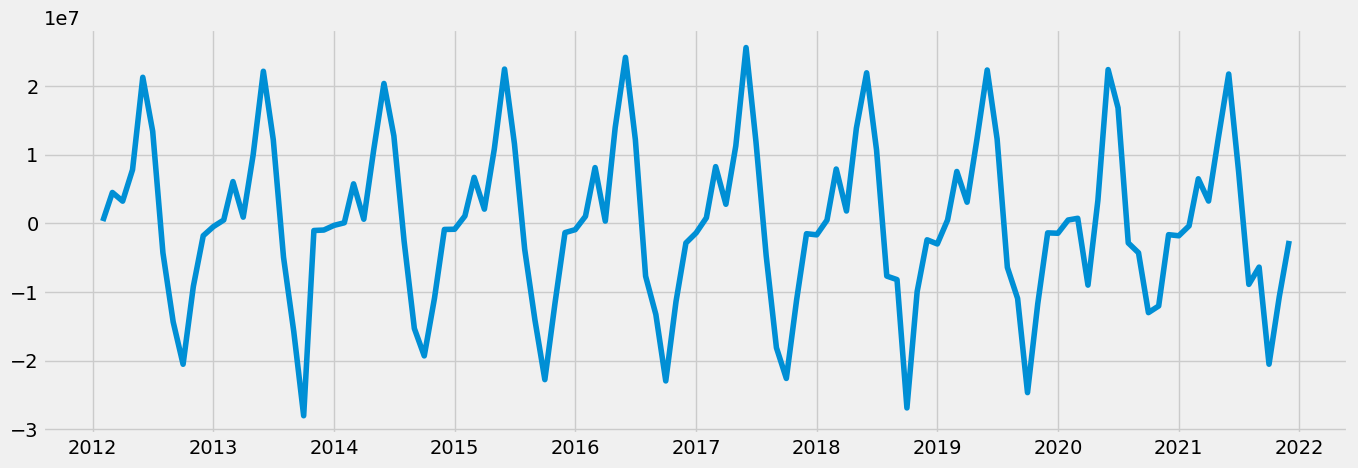

In [35]:
# Seeing what differencing did to the time-series curve

plt.figure(figsize=(15,5), dpi=100)
plt.plot(IM_diff)

In [36]:
# Retrying Dickey-Fuller test again to see if stationary now

dickey_fuller(IM_diff)

Dickey-Fuller Stationarity test:
Test Statistic                  -4.022222
p-value                          0.001299
Number of Lags Used             13.000000
Number of Observations Used    105.000000
Critical Value (1%)             -3.494220
Critical Value (5%)             -2.889485
Critical Value (10%)            -2.581676
dtype: float64


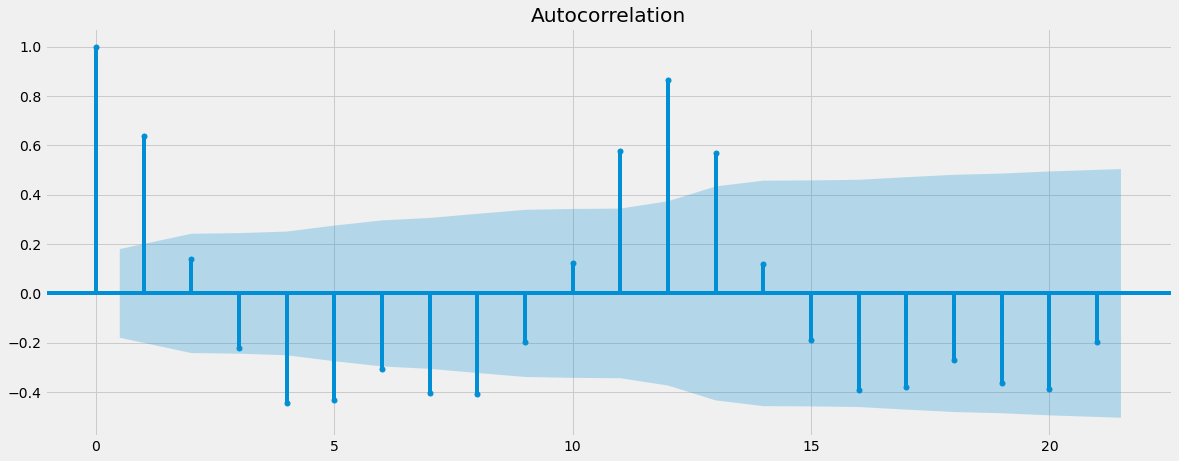

In [37]:
# Checking a plot of autocorrelations

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(IM_diff)
plt.show()

Now that Test Statistic (-4.02) < CV5% (-2.89), the data is stationary. However, the p-value is now 0.001, which would indicate that it is far from being significant now.

Our Null Hypothesis is now untrue and our Alternative Hypothesis that the data does not have a root & is stationary is true.